In [1]:
import numpy as np 
import pandas as pd 
import re
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
import matplotlib.colors as colors
colors_list = list(colors._colors_full_map.values())
#colors_list

In [4]:
player = pd.read_csv("./modified/season_record_2.csv")
team_stats = pd.read_csv("./modified/nba_team_traditional_stats.csv")

player['TEAM'] = player['TEAM_x']

In [5]:
player['SALARY'].mean()

6240529.714007782

In [6]:
player['TEAM'].head(10)

0    ATL
1    DEN
2    SAC
3    LAC
4    GSW
5    MEM
6    PHX
7    DEN
8    NYK
9    LAC
Name: TEAM, dtype: object

/Users/hellothere/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/hellothere/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


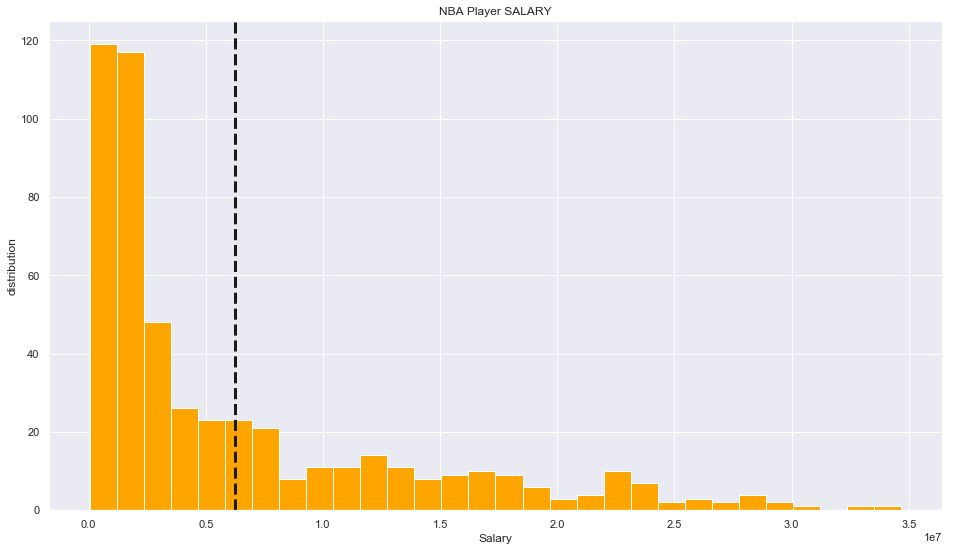

In [78]:
plt.xlabel('Salary')
plt.ylabel('distribution')
plt.title('NBA Player SALARY')
plt.rcParams["figure.figsize"] = [16,9]

#plt.hist(player['SALARY'], normed=True,color = 'orange',bins=30)

result = plt.hist(player['SALARY'],color = 'orange',bins=30)
plt.axvline(player['SALARY'].mean(), color='k', linestyle='dashed', linewidth=3)



In [9]:
team_stats.head(10)

TEAM  GP   W   L   WIN%   MIN    PTS   FGM   FGA   FG% ...   DREB   REB  \
0  HOU  82  65  17  0.793  48.2  112.4  38.7  84.2  46.0 ...   34.5  43.5   
1  TOR  82  59  23  0.720  48.4  111.7  41.3  87.4  47.2 ...   34.2  44.0   
2  GSW  82  58  24  0.707  48.1  113.5  42.8  85.1  50.3 ...   35.1  43.5   
3  BOS  82  55  27  0.671  48.3  104.0  38.3  85.1  45.0 ...   35.1  44.5   
4  PHI  82  52  30  0.634  48.2  109.8  40.8  86.6  47.2 ...   36.5  47.4   
5  CLE  82  50  32  0.610  48.1  110.9  40.4  84.8  47.6 ...   33.7  42.1   
6  POR  82  49  33  0.598  48.2  105.6  39.3  87.0  45.2 ...   35.3  45.5   
7  IND  82  48  34  0.585  48.2  105.6  40.8  86.4  47.2 ...   32.7  42.3   
8  NOP  82  48  34  0.585  48.7  111.7  42.7  88.3  48.3 ...   35.6  44.3   
9  OKC  82  48  34  0.585  48.4  107.9  39.9  88.1  45.3 ...   32.6  45.1   

    AST   TOV  STL  BLK  BLKA    PF   PFD   +-  
0  21.5  13.8  8.5  4.8   4.4  19.5  20.4  8.5  
1  24.3  13.4  7.6  6.1   4.9  21.7  19.9  7.8  
2  29.3  15.4  8.0  7.5   3.7  19.6  18.5  6.0  
3  22.5  14.0  7.4  4.5   4.4  19.7  19.2  3.6  
4  27.1  16.5  8.3  5.1   5.1  22.1  20.4  4.5  
5  23.4  13.7  7.1  3.8   4.1  18.6  20.7  0.9  
6  19.5  13.5  7.0  5.2   5.1  19.5  19.1  2.6  
7  22.2  13.3  8.8  4.1   5.2  18.8  18.5  1.4  
8  26.8  14.9  8.0  5.9   4.2  19.1  20.4  1.3  
9  21.3  14.0  9.1  5.0   4.6  20.2  21.3  3.4  

[10 rows x 27 columns]

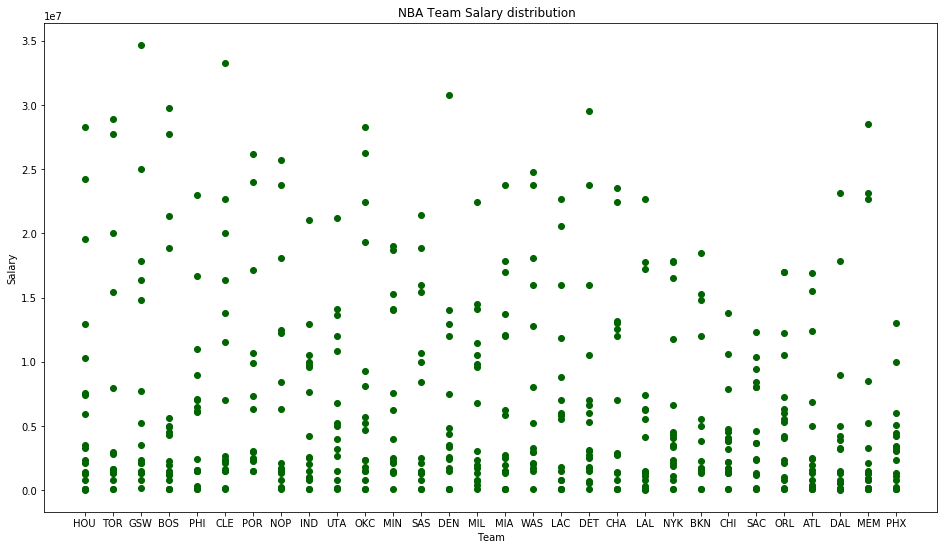

In [10]:

TEAM = pd.merge(player, team_stats, on='TEAM', suffixes=('', '_y'))
TEAM = TEAM.sort_values('W_y',ascending=False)

plt.xlabel('Team')
plt.ylabel('Salary')
plt.title('NBA Team Salary distribution  ')
plt.rcParams["figure.figsize"] = [16,9]
color = 'orange'
rlt = plt.scatter(TEAM['TEAM'], TEAM['SALARY'],color = 'darkgreen')



## correlation Between Salary And Time 

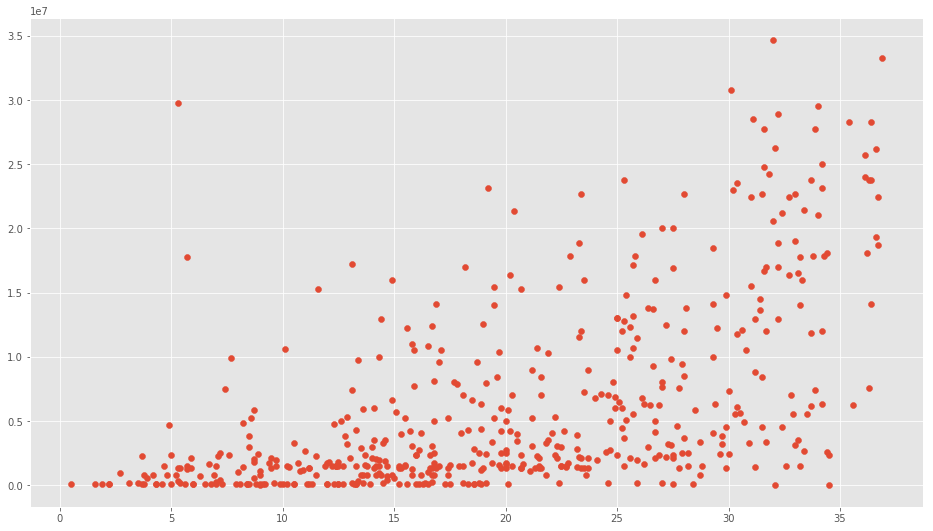

In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

# 1000 random integers between 0 and 50

x = player['MIN']
y = player['SALARY']

np.corrcoef(x, y)

plt.scatter(x, y)
plt.show()


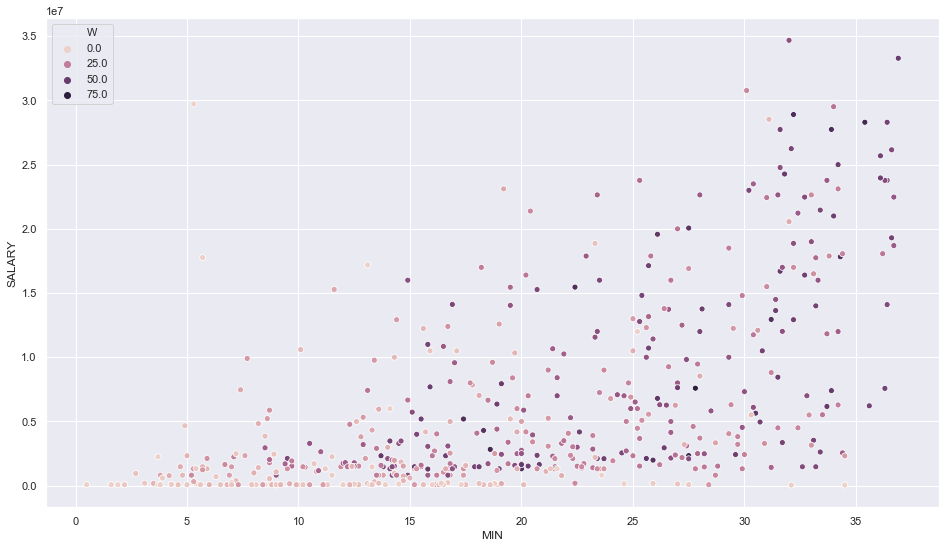

In [12]:
import seaborn as sns 
sns.set()
import matplotlib.pyplot as plt
player.columns
sns.scatterplot(x="MIN", y="SALARY",hue="W" ,data=player)

In [13]:
corr_ = player[['SALARY','W']]

corr_.corr()

SALARY         W
SALARY  1.000000  0.381587
W       0.381587  1.000000

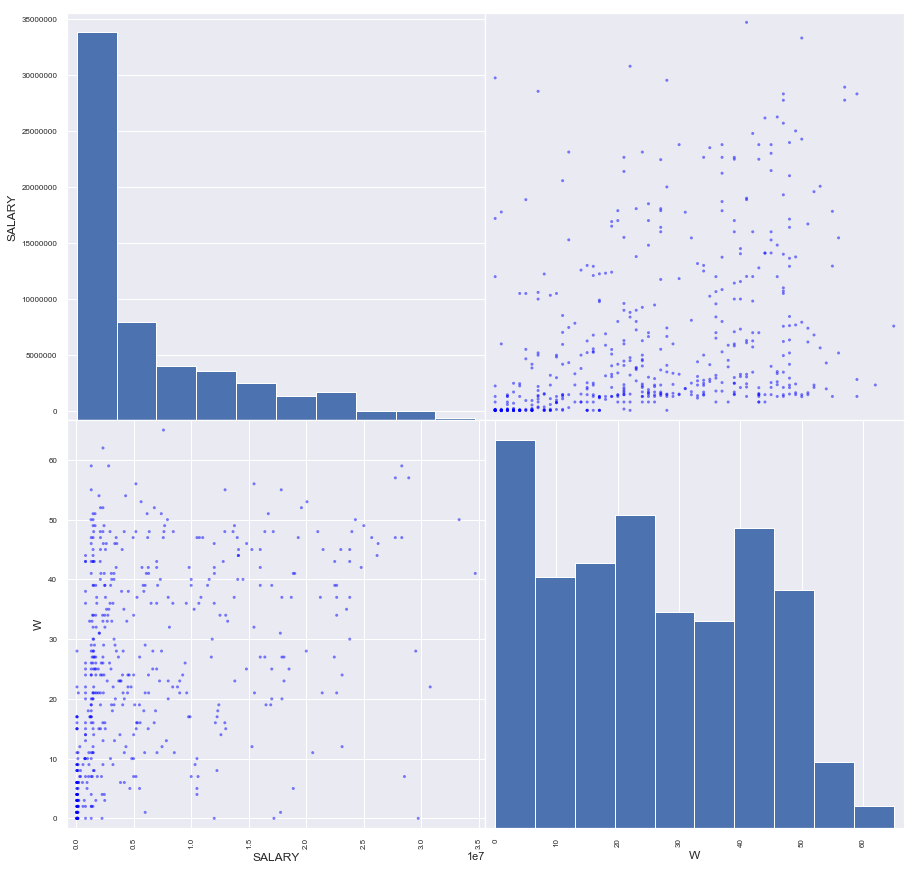

In [14]:
pd.plotting.scatter_matrix(corr_, figsize=(15, 15), color="blue")
plt.show()

## TOP10 WIN SHARE NBA PLAYER 

In [15]:
TEAM = TEAM.sort_values('WS',ascending=False)
TEAM[['PLAYER','TEAM','SALARY','WS']].head(10)

PLAYER TEAM      SALARY    WS
163           James Harden  HOU  28299399.0  15.4
388     Karl-Anthony Towns  MIN   6216840.0  14.0
240           LeBron James  CLE  33285709.0  14.0
486          Anthony Davis  NOP  23775506.0  13.7
454         Damian Lillard  POR  26153057.0  12.6
374  Giannis Antetokounmpo  MIL  22471911.0  11.9
325      LaMarcus Aldridge  SAS  21461010.0  10.9
19            Nikola Jokic  DEN   1471382.0  10.7
75            Kevin Durant  GSW  25000000.0  10.4
471         Andre Drummond  DET  23775506.0  10.3

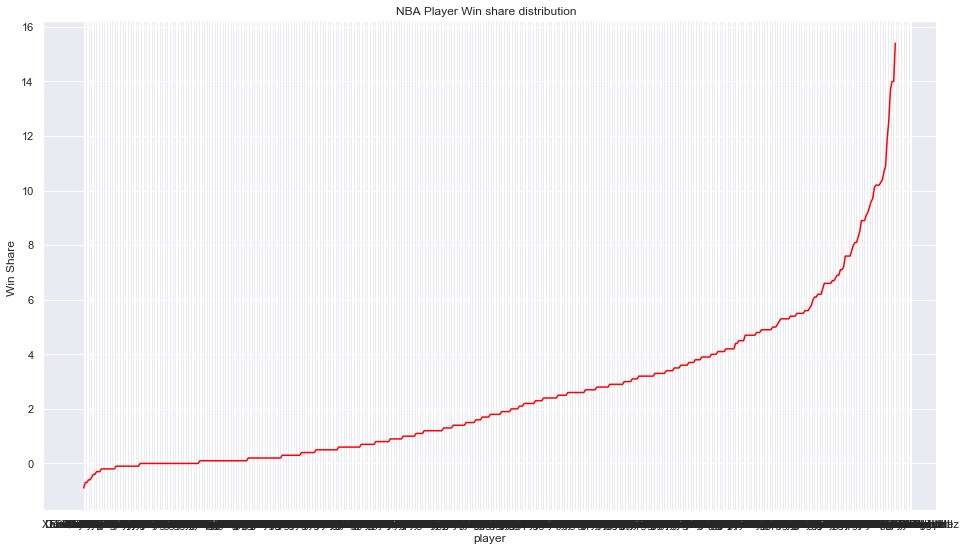

In [16]:
TEAM = TEAM.sort_values('WS',ascending=True)

plt.xlabel('player')
plt.ylabel('Win Share ')
plt.title('NBA Player Win share distribution  ')
plt.rcParams["figure.figsize"] = [16,9]
color = 'orange'
rlt = plt.plot (TEAM['PLAYER'], TEAM['WS'],color = 'red')
 

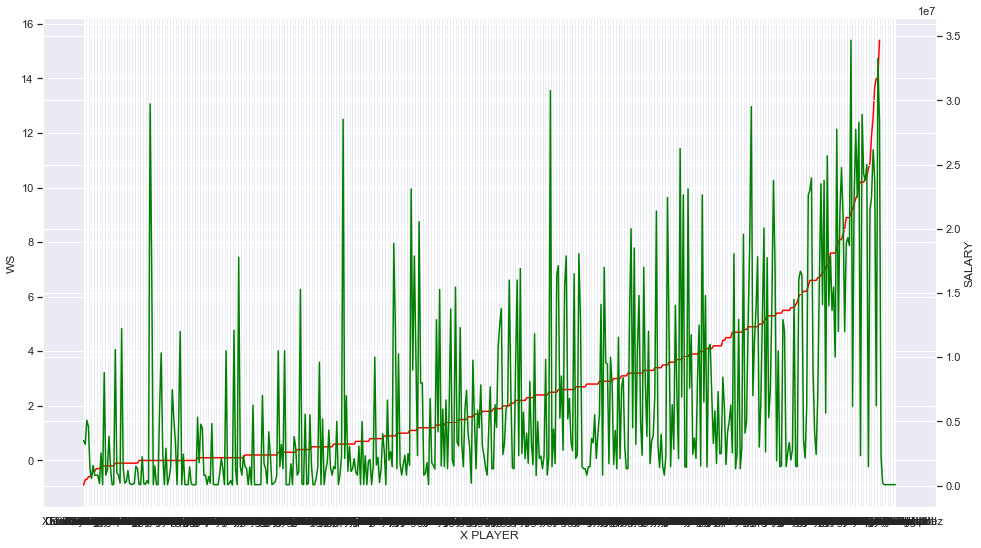

In [17]:
TEAM = TEAM.sort_values('WS',ascending=True)
xx = TEAM['PLAYER']
y1 = TEAM['WS']
y2 = TEAM['SALARY']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(xx, y1, color='red' )
ax2.plot(xx, y2, color='green' )

ax1.set_xlabel('X PLAYER')
ax1.set_ylabel('WS')
ax2.set_ylabel('SALARY')

plt.show()

## Let's Find Most cost effective Player
 - fomular 
      - WPS = Win share  / Player
          - WPS Sort by Desc
      - Play Game More than Total (82 Game) 70% 
          - more than 57G 
      - Avg Play Time More than 24 min per game ( 50 % )  

In [21]:
TEAM.columns

Index(['PLAYER', 'TEAM_x', 'AGE_x', 'GP', 'W', 'L', 'MIN', 'PTS', 'FGM', 'FGA',
       'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB',
       'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3', '+/-', 'TEAM_y',
       'SALARY', 'POS', 'AGE_y', 'TEAM', 'GAME', 'MP', 'PER', 'TS%', '3PAR',
       'FTR', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'WPS',
       'GP_y', 'W_y', 'L_y', 'WIN%', 'MIN_y', 'PTS_y', 'FGM_y', 'FGA_y',
       'FG%_y', '3PM_y', '3PA_y', '3P%_y', 'FTM_y', 'FTA_y', 'FT%_y', 'OREB_y',
       'DREB_y', 'REB_y', 'AST_y', 'TOV_y', 'STL_y', 'BLK_y', 'BLKA', 'PF_y',
       'PFD', '+-'],
      dtype='object')

In [54]:
#TEAM[TEAM['GP'] >= 57 & TEAM['MIN'] >= 24 ].sort_values('WPS',ascending=False).head(10)
#& TEAM['MIN'] >= 24
ECP1 = TEAM.loc[(TEAM['GP'] >= 57)].sort_values('WPS',ascending=False)
ECP = ECP1.loc[(ECP1['MIN'] >= 24)].head(10)
ECP = ECP[['PLAYER','TEAM','SALARY','WS']]
ECP

PLAYER TEAM     SALARY    WS
19              Nikola Jokic  DEN  1471382.0  10.7
159             Clint Capela  HOU  2334528.0  10.2
250        Spencer Dinwiddie  BKN  1524305.0   5.7
267          Josh Richardson  MIA  1471382.0   5.4
317            Kyle Anderson  SAS  2151704.0   6.2
180             Terry Rozier  BOS  1988520.0   5.6
251  Rondae Hollis-Jefferson  BKN  1455720.0   4.1
3               John Collins  ATL  1936920.0   5.4
334              Dario Saric  PHI  2422560.0   6.6
142               Kyle Kuzma  LAL  1423560.0   3.8

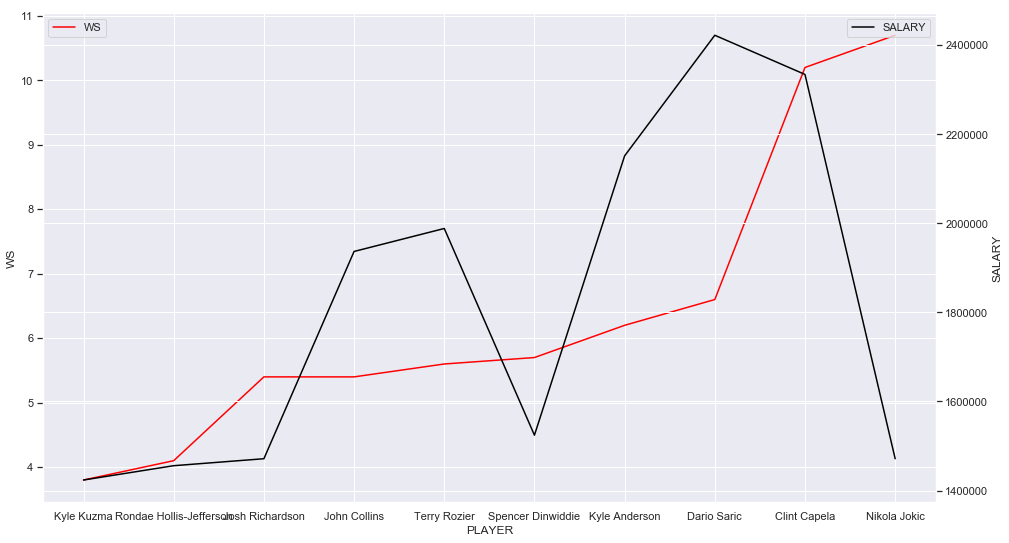

In [77]:
ECP = ECP.sort_values('WS',ascending=True)
xx = ECP['PLAYER']
y1 = ECP['WS']
y2 = ECP['SALARY']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(xx, y1, color='red' , label = "WS" )
ax2.plot(xx, y2, color='black', label = "SALARY" )

 

ax1.legend(loc='best')
ax2.legend(loc='best')
ax1.set_xlabel('PLAYER')
ax1.set_ylabel('WS')
ax2.set_ylabel('SALARY')
#ax1.legend(loc='upper left')

plt.show()